In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# --- ADIM 6: Kütüphaneler ve Drive Bağlantısı ---
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

# --- ADIM 7: Veri Yolları ve Sabit Parametreler ---

# Lütfen bu yolu KONTROL EDİN (model1.ipynb'deki ile aynı olmalı)
# Gerekirse sol menüden (klasör simgesi) yolu kopyalayıp yapıştırın
base_dir = '/content/drive/MyDrive/Colab Notebooks/MasaObjeleri/dataset'

# Parametreler (model1'deki ile aynı)
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMAGE_SIZE = (IMG_WIDTH, IMG_HEIGHT)
BATCH_SIZE = 32
EPOCHS = 15 # model2 için de 15 epoch deneyelim


# --- ADIM 8: Veri Yükleme (ImageDataGenerator) ---

# 1. Veri Yükleyiciyi Oluştur (Normalizasyon ve %20 Ayırma)
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# 2. Eğitim verilerini yükle
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

# 3. Doğrulama (Test) verilerini yükle
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 86 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [3]:
# Model 2: Sıfırdan Basit CNN Mimarisi

model2 = Sequential([
    # Girdi katmanı: 128x128 boyutunda 3 renkli (RGB) resim
    layers.Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3)),

    # Blok 1
    layers.Conv2D(32, (3, 3), activation='relu'), # 32 filtre ile özellikleri çıkar
    layers.MaxPooling2D((2, 2)), # Görüntüyü yarı yarıya küçült

    # Blok 2
    layers.Conv2D(64, (3, 3), activation='relu'), # 64 filtre ile daha karmaşık özellikleri çıkar
    layers.MaxPooling2D((2, 2)),

    # Blok 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Sınıflandırma Katmanları
    layers.Flatten(), # Özellik haritasını düzleştir (vektör yap)
    layers.Dense(128, activation='relu'), # Tamamen bağlı katman
    layers.Dense(1, activation='sigmoid') # Çıkış katmanı (0=mouse, 1=havya)
])

In [4]:
# Model 2'yi derleme
model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Model 2'nin mimarisini özetle
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Model 2'yi eğitmeye başla!

# model2.fit -> modeli eğit
# train_generator -> 86 resimlik eğitim verisi
# epochs=EPOCHS -> 15 "tur"
# validation_data=validation_generator -> 20 resimlik doğrulama verisi

history_model2 = model2.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 32s 21s/step - accuracy: 0.5000 - loss: 0.8366 - val_accuracy: 0.5000 - val_loss: 0.6983
Epoch 2/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 854ms/step - accuracy: 0.5625 - loss: 0.6807

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 700ms/step - accuracy: 0.5625 - loss: 0.6807 - val_accuracy: 0.5000 - val_loss: 0.7602
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.5436 - loss: 0.7007 - val_accuracy: 0.9500 - val_loss: 0.6558
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 668ms/step - accuracy: 0.9375 - loss: 0.6493 - val_accuracy: 0.5000 - val_loss: 0.6297
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5312 - loss: 0.6208 - val_accuracy: 0.9000 - val_loss: 0.5472
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 968ms/step - accuracy: 0.9375 - loss: 0.5119 - val_accuracy: 0.9000 - val_loss: 0.5278
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.8490 - loss: 0.5262 - val_accuracy: 0.9000 - val_loss: 0.4169
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 691ms/step - accuracy: 0.9688 - loss: 0.3377 - val_accuracy: 0.7000 - val_loss: 0.5489
Epoch 9/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.7396 - loss: 0.5221 - val_accuracy: 0.9500 - val_loss: 0.2907
Epoch 10/15
2/2

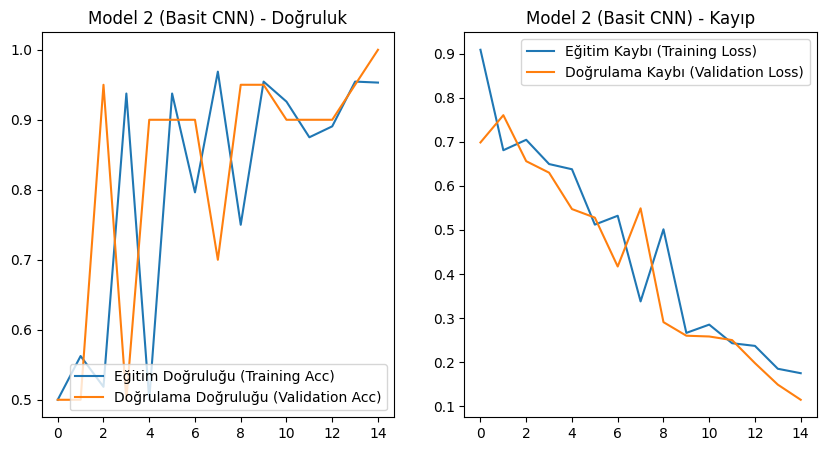


--- Model 2 Raporu ---
Model 2'nin son (Test/Doğrulama) doğruluğu: %100.00


In [6]:
# Eğitim sonuçlarını (history_model2) al
acc = history_model2.history['accuracy']
val_acc = history_model2.history['val_accuracy']
loss = history_model2.history['loss']
val_loss = history_model2.history['val_loss']

epochs_range = range(len(acc)) # Epoch sayısını history'den al

# 1. Grafik: Eğitim ve Doğrulama DOĞRULUK Grafiği
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim Doğruluğu (Training Acc)')
plt.plot(epochs_range, val_acc, label='Doğrulama Doğruluğu (Validation Acc)')
plt.legend(loc='lower right')
plt.title('Model 2 (Basit CNN) - Doğruluk')

# 2. Grafik: Eğitim ve Doğrulama KAYIP Grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı (Training Loss)')
plt.plot(epochs_range, val_loss, label='Doğrulama Kaybı (Validation Loss)')
plt.legend(loc='upper right')
plt.title('Model 2 (Basit CNN) - Kayıp')
plt.show()

# Test (Doğrulama) Seti Sonucunu Raporla
print("\n--- Model 2 Raporu ---")
final_val_accuracy = val_acc[-1] # Listenin son elemanı
print(f"Model 2'nin son (Test/Doğrulama) doğruluğu: %{final_val_accuracy * 100:.2f}")